# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [3]:
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

In [10]:
athletes = pd.read_csv("athletes.csv")

In [11]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [12]:
# Sua análise começa aqui.
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [13]:
athletes.shape

(11538, 11)

In [14]:
sample = get_sample(athletes, 'height', n=3000)

In [15]:
sample.mode()

0    1.8
dtype: float64

In [16]:
sample.mean()

1.766779999999997

In [17]:
sample.median()

1.76

A moda, média e a mediana possuem valores próximos (considerando as características dos dados), porém será que essa proximidade relativa é suficiente para dizer que a distribuição é considerada estatisticamente uma distribuição normal? Para isso é necessário fazer testes estatísticos para comprovar ou refutar a hipótese levantada.

**1. Formulação da Hipótese:**

   $H_0$ = A amostra provém de uma população normal
   
   $H_1$ = A amostra NÃO provém de uma população normal
   
**2. Estabelecer o Nível de significância do teste ($\alpha$)**
    
   $\alpha$ = 0.05
    
**3. Calcular o coeficiente de Shapiro-Wilk e o p-valor**

    sct.shapiro(sample)
    
**4. Fazer a análise do resultado**

    Tomar a decisão: Rejeitar $H_0$ ao nível de significância $\alpha=0.05$ se p > $\alpha$

**Teste de Shapiro-Wilk**

O objetivo deste teste é fornecer uma estatística de teste para avaliar se uma amostra tem distribuição Normal. O teste pode ser utilizado para amostras de qualquer tamanho. (A função implementada no Python é feita apenas para 5000 amostras)

In [147]:
stats, p = sct.shapiro(sample)

In [148]:
p

5.681722541339695e-07

In [149]:
alpha = 0.05

In [150]:
def q1():
    alpha = 0.05
    sample = get_sample(athletes, 'height', n=3000)
    stats, p = sct.shapiro(sample)
    print(p)
    if p > alpha:
        return True  #Aceitar a hipotese nula (É uma distribuição normal)
    else:
        return False #Rejeitar a hipotese nula (Não é uma distribuição normal)
    

In [151]:
q1()

5.681722541339695e-07


False

Nesse caso, observamos que o p-valor é menor que o nível de significância, ou seja devemos rejeitar a hipótese nula. Ou seja, não temos evidências suficientes para afirmar que a distribuição seja normal

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

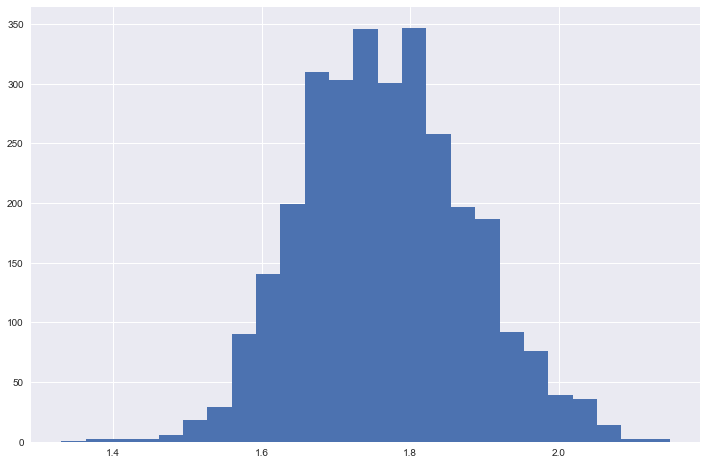

In [152]:
sample.hist(bins=25);

Visualmente o histograma se assemelha a distribuição normal, porém não podemos nos apegar puramente em análises visuais. Devemos aplicar testes estatísticos para conprovar ou refutar a hipótese nula.

* Plote o qq-plot para essa variável e a analise.

In [25]:
import numpy as np 
import statsmodels.api as sm 
import pylab as py 

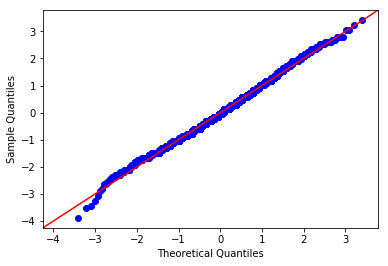

In [26]:
sm.qqplot(sample, fit=True, line ='45') ;

A distribuição dos dados sobre a reta no qqplot pode nos dar informações interessantes sobre o comportamento dos dados.
Nesse caso verificamos que na parte inferior do gráfico temos pontos que não estão sobre a reta, inidica que existe uma cauda suave no lado esquerdo da curva (possivel verificar no histograma)

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [27]:
stats, p = sct.jarque_bera(sample)
p

0.001478366424594868

In [28]:
def q2():
    alpha = 0.05
    sample = get_sample(athletes, 'height', n=3000)
    stats, p = sct.jarque_bera(sample)
    if p > alpha: 
        return True # Aceitar a hipotese nula (É uma distribuição normal) 
    else:
        return False #Rejeitar a hipotese nula (Não é uma distribuição normal)

In [29]:
q2()

False

__Para refletir__:

* Esse resultado faz sentido?

Novamente o p-valor foi menor do que o nível de significância, o que indica que devemos rejeitar a hipótese nula, ou seja não temos argumentos suficientes para indicar que a distribuição é normal

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [30]:
sample_weight = get_sample(athletes, 'weight', n=3000)
stats, p = sct.normaltest(sample_weight)
p

1.5898922918029537e-111

In [31]:
def q3():
    alpha = 0.05
    sample_weight = get_sample(athletes, 'weight', n=3000)
    stats, p = sct.normaltest(sample_weight)
    if p > alpha:
        return True #Aceitar a hipotese nula (É uma distribuição normal)
    else:
        return False #Rejeitar a hipotese nula (Não é uma distribuição normal)

In [32]:
q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

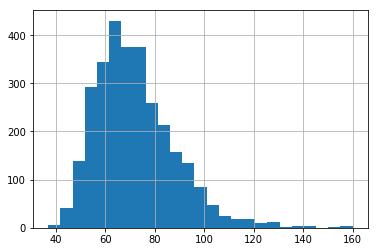

In [33]:
sample_weight.hist(bins=25);

O gráfico mostra que existe um prolongamento da cauda direita, ou seja não é uma distribuição normal conforme refutado pelo teste.


* Um _box plot_ também poderia ajudar a entender a resposta.

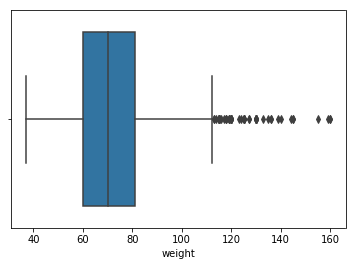

In [34]:
sns.boxplot(sample_weight);

O boxplot confirma que a distribuição da variavel weight não é uma distribuição normal, mostrando que há um prolongamento da cauda direita indicando uma assimetria positiva.

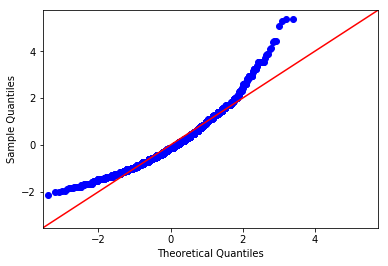

In [35]:
sm.qqplot(sample_weight, fit=True, line="45");

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [36]:
weight_log = np.log(sample_weight)
stats, p = sct.normaltest(weight_log)
p

1.0705572101256944e-10

In [37]:
def q4():
    alpha = 0.05
    sample_weight = get_sample(athletes, 'weight', n=3000)
    weight_log = np.log(sample_weight)
    stats, p = sct.normaltest(weight_log)
    if p > alpha:
        return True #Aceitar a hipotese nula (É uma distribuição normal)
    else:
        return False #Rejeitar a hipotese nula (Não é uma distribuição normal)

In [38]:
q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

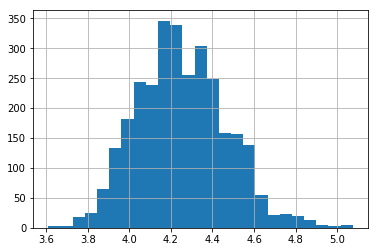

In [39]:
weight_log.hist(bins=25);

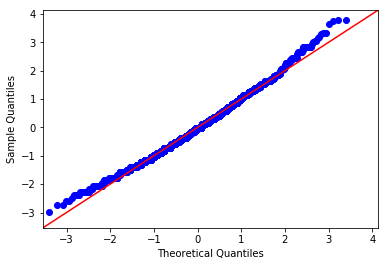

In [40]:
sm.qqplot(weight_log, fit=True, line="45");

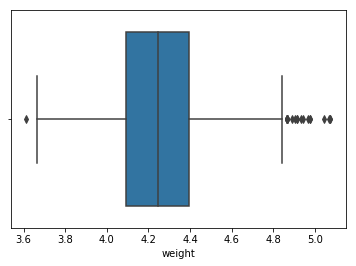

In [41]:
sns.boxplot(weight_log);

Visualmente os gráficos aplicando a transformação logarítimica se aproximaram mais da curva normal do que sem a transformação.
O que é esperado pelo efeito do log, porém visualmente ainda conseguimos verificar a assimetria nos 3 gráficos mostrados. O valor p no teste normal confirma isso. Ainda conseguimos verificar o aumento do p-valor quando utilizamos os dados transformados.

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [42]:
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [43]:
bra = athletes[athletes['nationality']=='BRA']
can = athletes[athletes['nationality']=='CAN']
usa = athletes[athletes['nationality']=='USA']

In [44]:
stats_bc, p_braxcan = sct.ttest_ind(bra['height'], can['height'], equal_var=False, nan_policy='omit')

In [45]:
stats_bu, p_braxusa = sct.ttest_ind(bra['height'], usa['height'], equal_var=False, nan_policy='omit')

In [46]:
stats_cu, p_canxusa = sct.ttest_ind(can['height'], usa['height'], equal_var=False, nan_policy='omit')

In [47]:
p_braxcan

0.5230827295440921

In [48]:
p_braxusa

0.0013080041830140115

In [49]:
p_canxusa

0.0004660129347389851

In [50]:
def q5():
    # Retorne aqui o resultado da questão 5.
    bra = athletes[athletes['nationality']=='BRA']
    usa = athletes[athletes['nationality']=='USA']
    stats_bu, p_braxusa = sct.ttest_ind(bra['height'], usa['height'], equal_var=False, nan_policy='omit')
    alpha = 0.05
    if p_braxusa > alpha:
        return True #Aceita a hipotese nula (As médias são iguais)
    else:
        return False #Rejeita a hipotese nula (As médias não são iguais)

In [51]:
q5()

False

In [52]:
bra['height'].mean()

1.764033613445379

In [53]:
usa['height'].mean()

1.7877678571428557

In [54]:
bra['height'].std()

0.11738784535112096

In [55]:
usa['height'].std()

0.118961741429098

C:\Users\Usuario\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Usuario\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


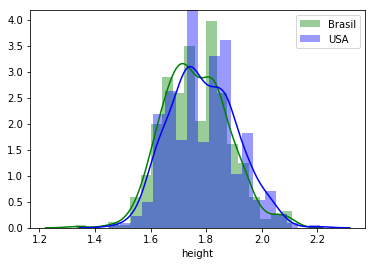

In [56]:
sns.distplot(bra['height'].dropna(), label='Brasil', color='green')
sns.distplot(usa['height'].dropna(), label='USA', color ='blue')
plt.legend();

O teste encontrou um p-valor menor que o valor de significância $\alpha$ o que indica deve-se rejeitar a hipótese nula. Ou seja as médias das distribuições entre o Brasil e os Estados Unidos não são iguais.

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [57]:
def q6():
    # Retorne aqui o resultado da questão 6.
    bra = athletes[athletes['nationality']=='BRA']
    can = athletes[athletes['nationality']=='CAN']
    stats_bu, p_braxcan = sct.ttest_ind(bra['height'], can['height'], equal_var=False, nan_policy='omit')
    alpha = 0.05
    if p_braxcan > alpha:
        return True #Aceita a hipotese nula (As médias são iguais)
    else:
        return False #Rejeita a hipotese nula (As médias não são iguais)

In [58]:
q6()

True

In [59]:
bra['height'].mean()

1.764033613445379

In [60]:
can['height'].mean()

1.7585937500000004

In [61]:
bra['height'].std()

0.11738784535112096

In [62]:
can['height'].std()

0.11803600730445003

C:\Users\Usuario\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Usuario\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


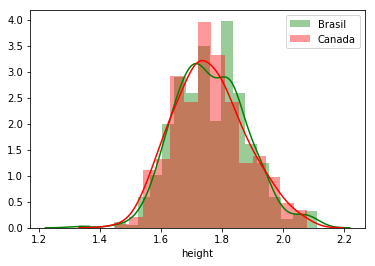

In [63]:
sns.distplot(bra['height'].dropna(), label='Brasil', color='green')
sns.distplot(can['height'].dropna(), label='Canada', color ='red')
plt.legend();

O teste obteve um p-valor maior do que o valor de significância $\alpha$ isso indica que pode-se aceitar a hipotese nula, ou seja considerar as médias de altura entre os atletas do brasil e dos estados unidos igual.

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [64]:
def q7():
    usa = athletes[athletes['nationality']=='USA']
    can = athletes[athletes['nationality']=='CAN']
    stats_bu, p_usaxcan = sct.ttest_ind(usa['height'], can['height'], equal_var=False, nan_policy='omit')
    alpha = 0.05
    return round(p_usaxcan,8)

In [65]:
q7()

0.00046601

In [66]:
usa['height'].mean()

1.7877678571428557

In [67]:
can['height'].mean()

1.7585937500000004

In [68]:
usa['height'].std()

0.118961741429098

In [69]:
can['height'].std()

0.11803600730445003

C:\Users\Usuario\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Usuario\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


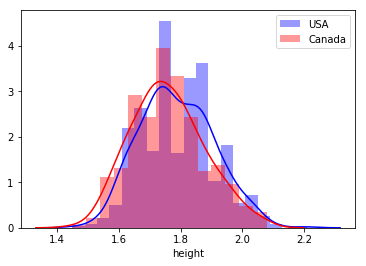

In [70]:
sns.distplot(usa['height'].dropna(), label='USA', color='blue')
sns.distplot(can['height'].dropna(), label='Canada', color ='red')
plt.legend();

O p-valor obtido no teste é menor que o valor de significância escolhido $\alpha$=0,05 o que refuta a hipótese nula, ou seja,
não se pode afirmar  que as médias são iguais

__Para refletir__:

O resultado mostra que as médias de altura entre os atletas do Brasil e do Canadá são estatísticamente iguais e a média de altura dos atletas dos Estados Unidos é maior do que as do atletas do Brasil e do Canadá.